# Due July/23/2018 11:59:59 PM, PST.

### Kullback-Leibler (KL) divergence (15%)

The Kullback-Leibler (KL) divergence between two discrete-valued distributions $P(X)$, $Q(X)$ is defined as follows:

$$
KL(P||Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)}
$$

Here, we assume all $P(X)$ and $Q(x)$ are greater than zero. We wish to prove following facts.

(a) For all $P, Q$, we have $KL(P || Q) \geq 0$, the equality will hold if and only if $P = Q$. So this measure is non-negative.

(b) If we define following KL divergence for conditional distribution:

$$KL(P(X|Y)||Q(X/Y)) = \sum_{y}P(y) (\sum_{x}\log P(x|y)\log \frac{P(x|y)}{Q(x|y)})$$

Show that 

$$KL(P(X,Y)||Q(X,Y)) = KL(P(X)||Q(X)) + KL(P(Y|X)||Q(Y|X))$$.

(c) Let the empirical distribution be $\hat{P}(x) = \frac{1}{m}\sum_{i=1}^{m}1\{x^{(i)} = x\}$, i.e., just the same as picking a random example from the training set. Suppose we have some family of distributions $P_{\theta}$ parameterized by $\theta$. Prove that 


$$\arg \min_{\theta} KL (\hat{P} || P_{\theta})＝\arg \max_{\theta}\sum_{i=1}^{m}\log P_{\theta}(x^{(i)})$$

This indicates that finding the maximum likelihood estimate for the parameter $\theta$ is equivalent to finding $P_{\theta}$ with minimal KL divergence from $\hat{P}$.




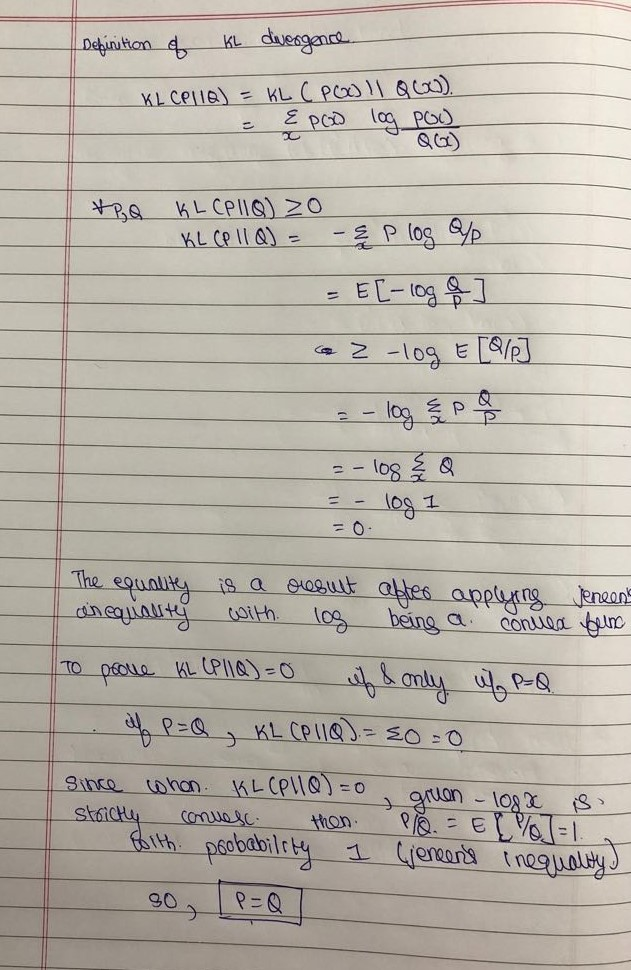

In [13]:
from IPython.display import Image
Image(filename="C:/Users/jeevan venkataramana/Downloads/1.jpeg", width=400, height=400)

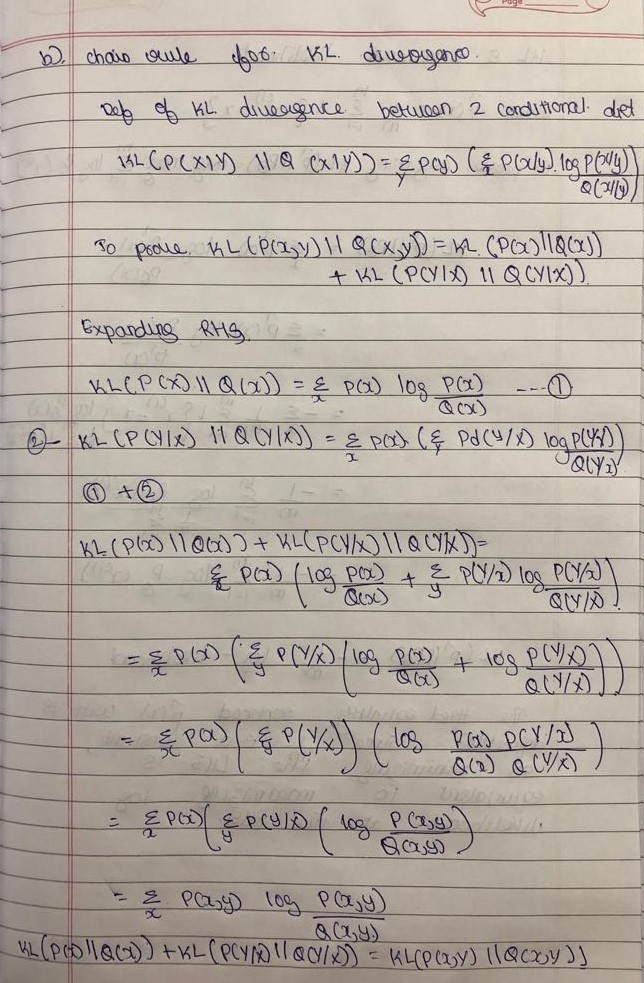

In [14]:
Image(filename="C:/Users/jeevan venkataramana/Downloads/2.jpeg", width=400, height=400)

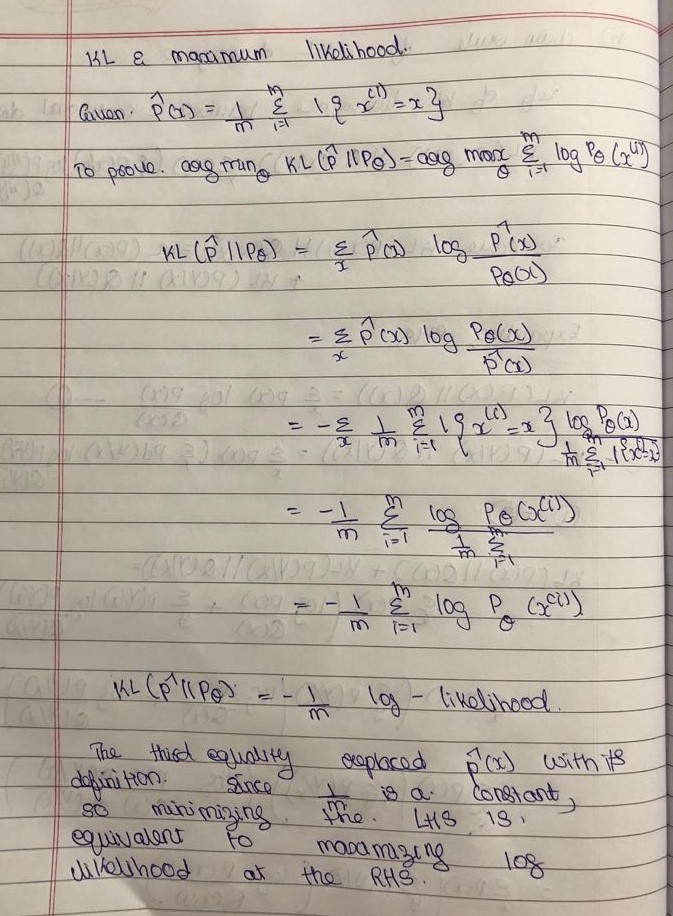

In [15]:
Image(filename="C:/Users/jeevan venkataramana/Downloads/3.jpeg", width=400, height=400)

### EM for MAP estimation (15%)

The EM algorithm that we talked about in class was for solving a maximum likelihood estimation problem. Now, we wish to generalize EM to solve a maximum a posteriori probability (MAP) estimation problme as 

$$\arg \max_{\theta} (\prod_{i=1}^{m}\sum_{z^{(i)}} p (x^{(i)}, z^{(i)}|\theta)) p(\theta)$$

where $p(\theta)$ is prior on the paramters, $x^{(i)}$ are our samples and $z^{(i)}$ are latent variables contributed to sample $x^{(i)}$.

Could you derive E-step and M-step for EM algorithm to MAP estimation?
 


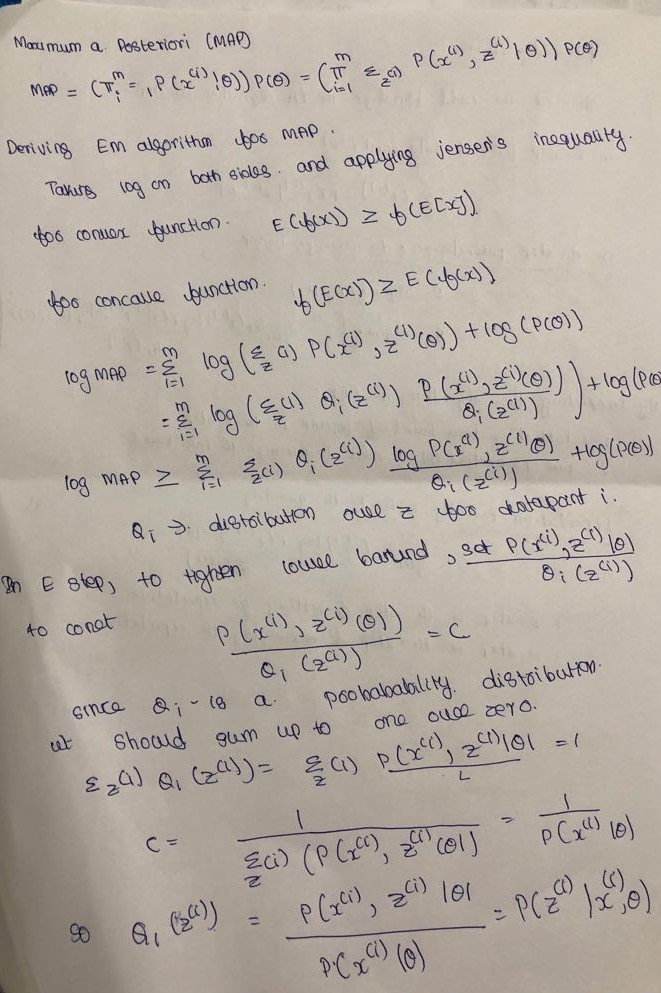

In [16]:
Image(filename="C:/Users/jeevan venkataramana/Downloads/4.jpeg", width=400, height=400)

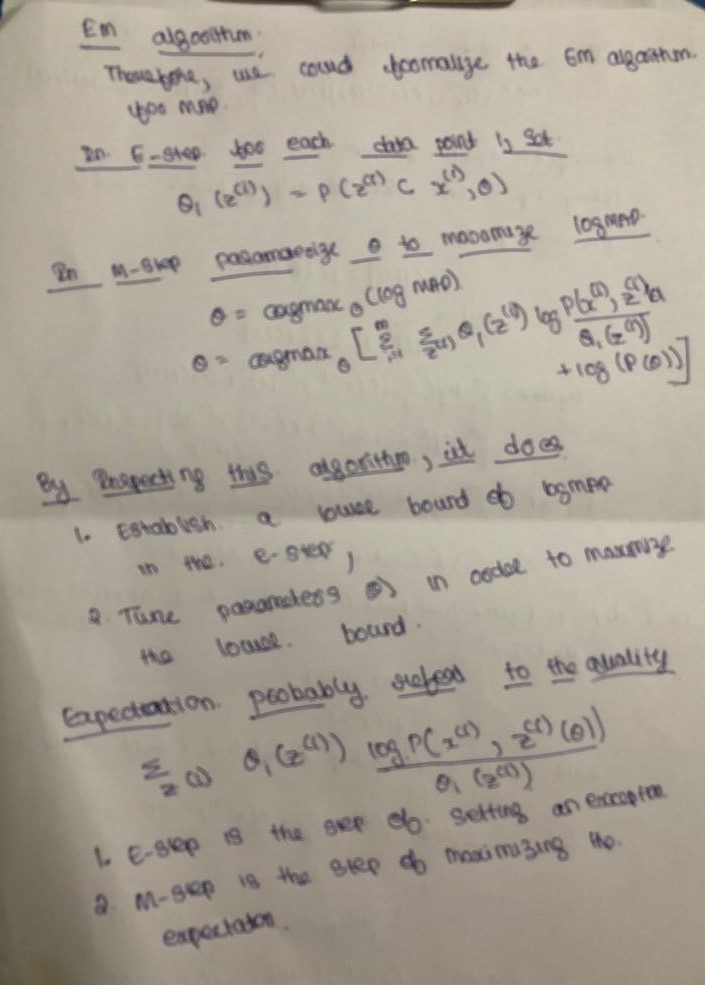

In [17]:
Image(filename="C:/Users/jeevan venkataramana/Downloads/5.jpeg", width=400, height=400)

### Poisonous mushrooms (70%)

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, We tried to binarized the feature space. Look at the feature_names below to see all 126 binary names. mushroom.map and mushroom.data will be provided.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names: %d' %len(feature_names))



Loaded feature names: 126


In [21]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for $k$ in $[1, 50]$.


k 	 explained variance ratio
1 	 16.40%
2 	 13.32%
3 	 10.17%
4 	 7.06%
5 	 3.87%
6 	 3.68%
7 	 3.13%
8 	 2.73%
9 	 2.62%
10 	 2.23%
11 	 2.05%
12 	 1.87%
13 	 1.73%
14 	 1.68%
15 	 1.52%
16 	 1.51%
17 	 1.43%
18 	 1.41%
19 	 1.33%
20 	 1.15%
21 	 1.07%
22 	 1.07%
23 	 1.04%
24 	 0.99%
25 	 0.91%
26 	 0.87%
27 	 0.80%
28 	 0.78%
29 	 0.74%
30 	 0.70%
31 	 0.64%
32 	 0.61%
33 	 0.57%
34 	 0.53%
35 	 0.53%
36 	 0.50%
37 	 0.50%
38 	 0.46%
39 	 0.45%
40 	 0.44%
41 	 0.42%
42 	 0.40%
43 	 0.37%
44 	 0.36%
45 	 0.34%
46 	 0.30%
47 	 0.27%
48 	 0.24%
49 	 0.22%
50 	 0.20%


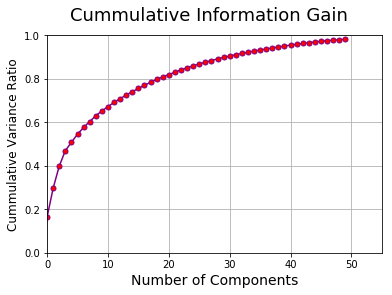

In [22]:
def P1():

    # PCA with 50 components
    n_comp = 50
    pca = PCA(n_components = n_comp)
    pca.fit(train_data)
    pca_cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    # Plot the Information Gain graph
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(pca_cumsum, color = 'purple', marker = 'o', ms = 5, mfc = 'red')
    fig.suptitle('Cummulative Information Gain', fontsize=18)
    plt.xlabel('Number of Components', fontsize=14)
    plt.ylabel('Cummulative Variance Ratio', fontsize=12)
    plt.grid(True)
    ax.set_xlim([0,55])
    ax.set_ylim([0.0,1.0])
    
    print('k \t explained variance ratio')

    for k in range(1,51):    
        print("%d \t %s" % (k, '{0:.2f}%'.format(pca.explained_variance_ratio_[k-1] * 100)))

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

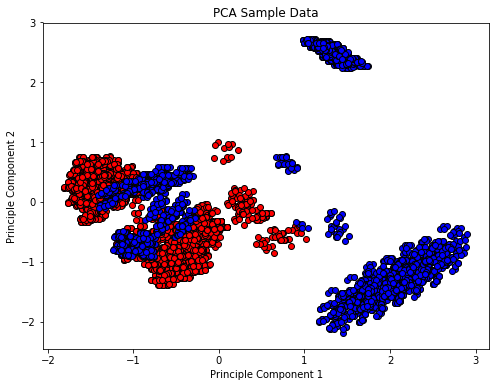

In [23]:
def P2():

    n_comp = 2
    pca_mod = PCA(n_components = 2)
    train_data_transformed = pca_mod.fit_transform(train_data)

    plt.figure(figsize=(8, 6))
    p = plt.subplot(1, 1, 1)
    p.scatter(train_data_transformed[train_labels == 0, 0], train_data_transformed[train_labels == 0, 1],
              edgecolors='black',color='red',marker='o')
    p.scatter(train_data_transformed[train_labels == 1, 0], train_data_transformed[train_labels == 1, 1],
              edgecolors='black',color='blue',marker='o')
    plt.title("PCA Sample Data")
    plt.xlabel("Principle Component 1")
    plt.ylabel("Principle Component 2")

P2()

(3) Run KMeans with $[1,16]$ clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

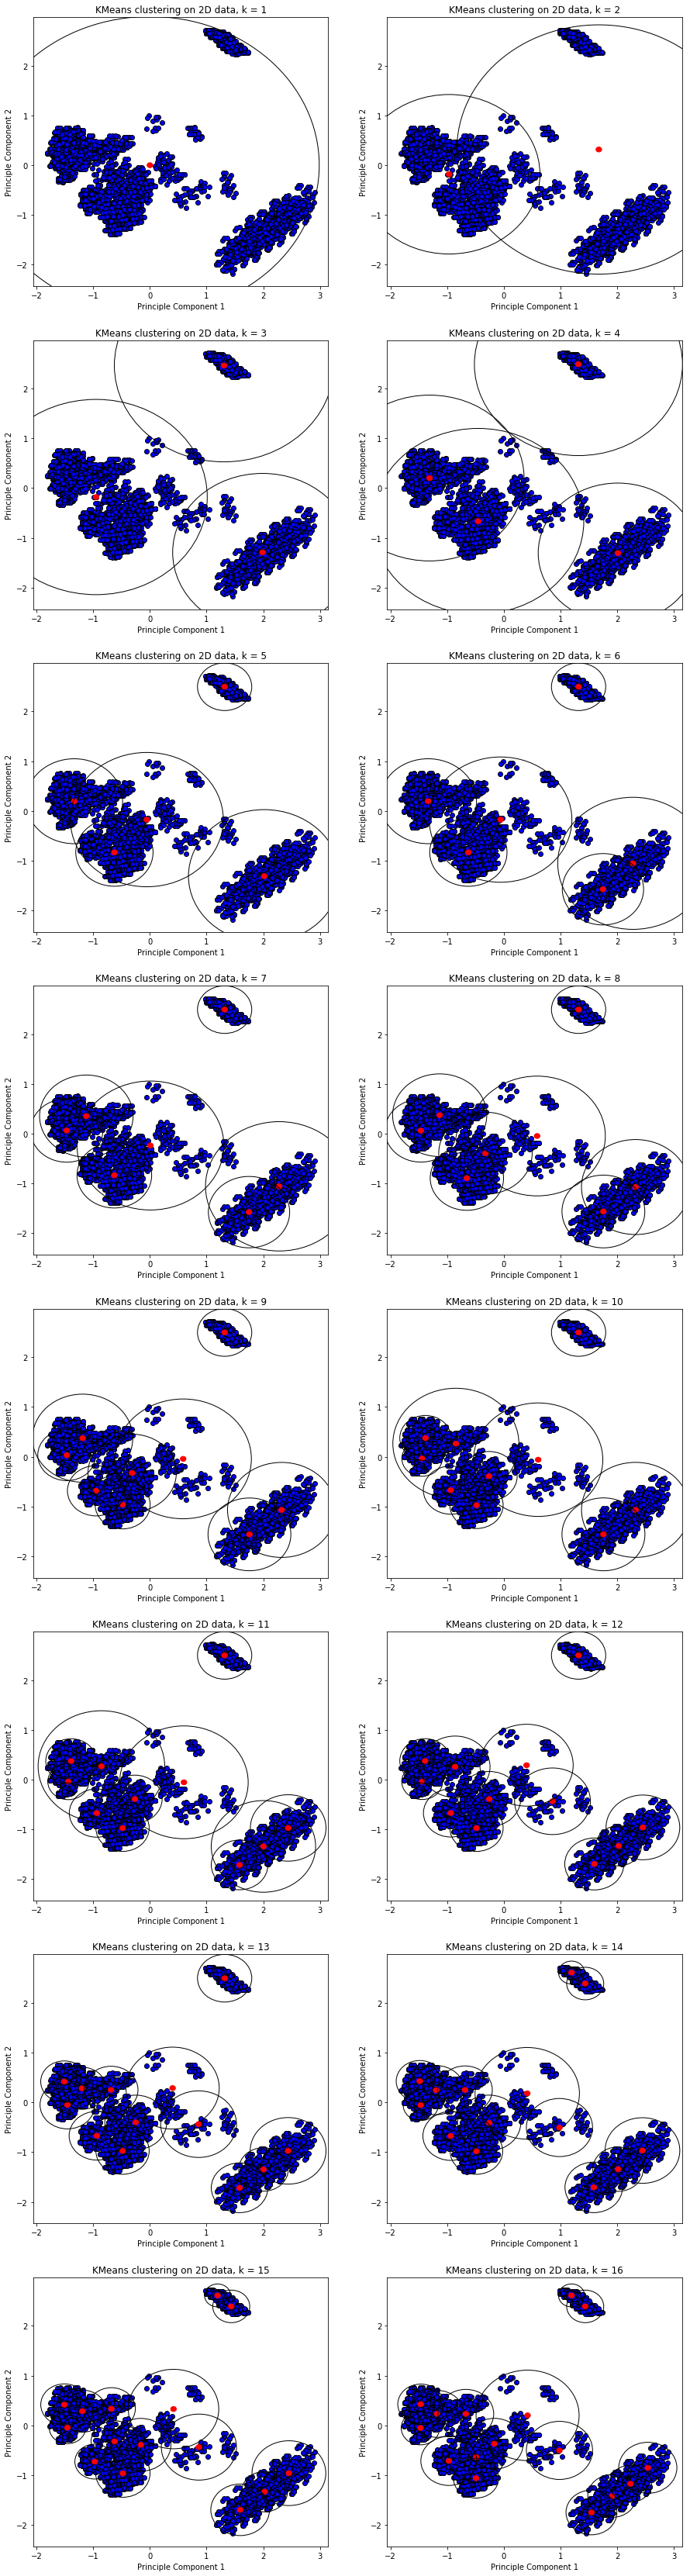

In [24]:
def P3():

    plt.figure(figsize=(15, 60))

    # Project the data to 2D
    n_comp = 2
    pca_mod = PCA(n_components = 2)
    train_data_transformed = pca_mod.fit_transform(train_data)

    for i in range(16):
        
        # Set up the plot
        ax = plt.subplot(8, 2, i+1)
        
        # Set up k-means 
        km = KMeans(n_clusters=i+1, init='k-means++')
        
        # Train the clustering algorithm
        clstrs = km.fit(train_data_transformed)

        # Find the center of each cluster, and the distances to each point
        centers = [(clstrs.cluster_centers_[j,0],clstrs.cluster_centers_[j,1]) for j in range(i+1)]
        dists = km.transform(train_data_transformed)

        # The scatterplot
        ax.scatter(train_data_transformed[:, 0], train_data_transformed[:, 1], edgecolors='black',color='blue',marker='o')
        plt.title('KMeans clustering on 2D data, k = %i' %(i+1)) 
        plt.xlabel("Principle Component 1")
        plt.ylabel("Principle Component 2")
    
        # Add the cluster centers and a circle encompassing all points in the cluster
        for j in range(i+1):
            circle = plt.Circle(centers[j], np.max(dists[clstrs.labels_ == j,j]),edgecolor='black',fill=False)
            my_center = plt.Circle(centers[j], 0.05, color='red')
            ax.add_artist(circle)
            ax.add_artist(my_center)

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


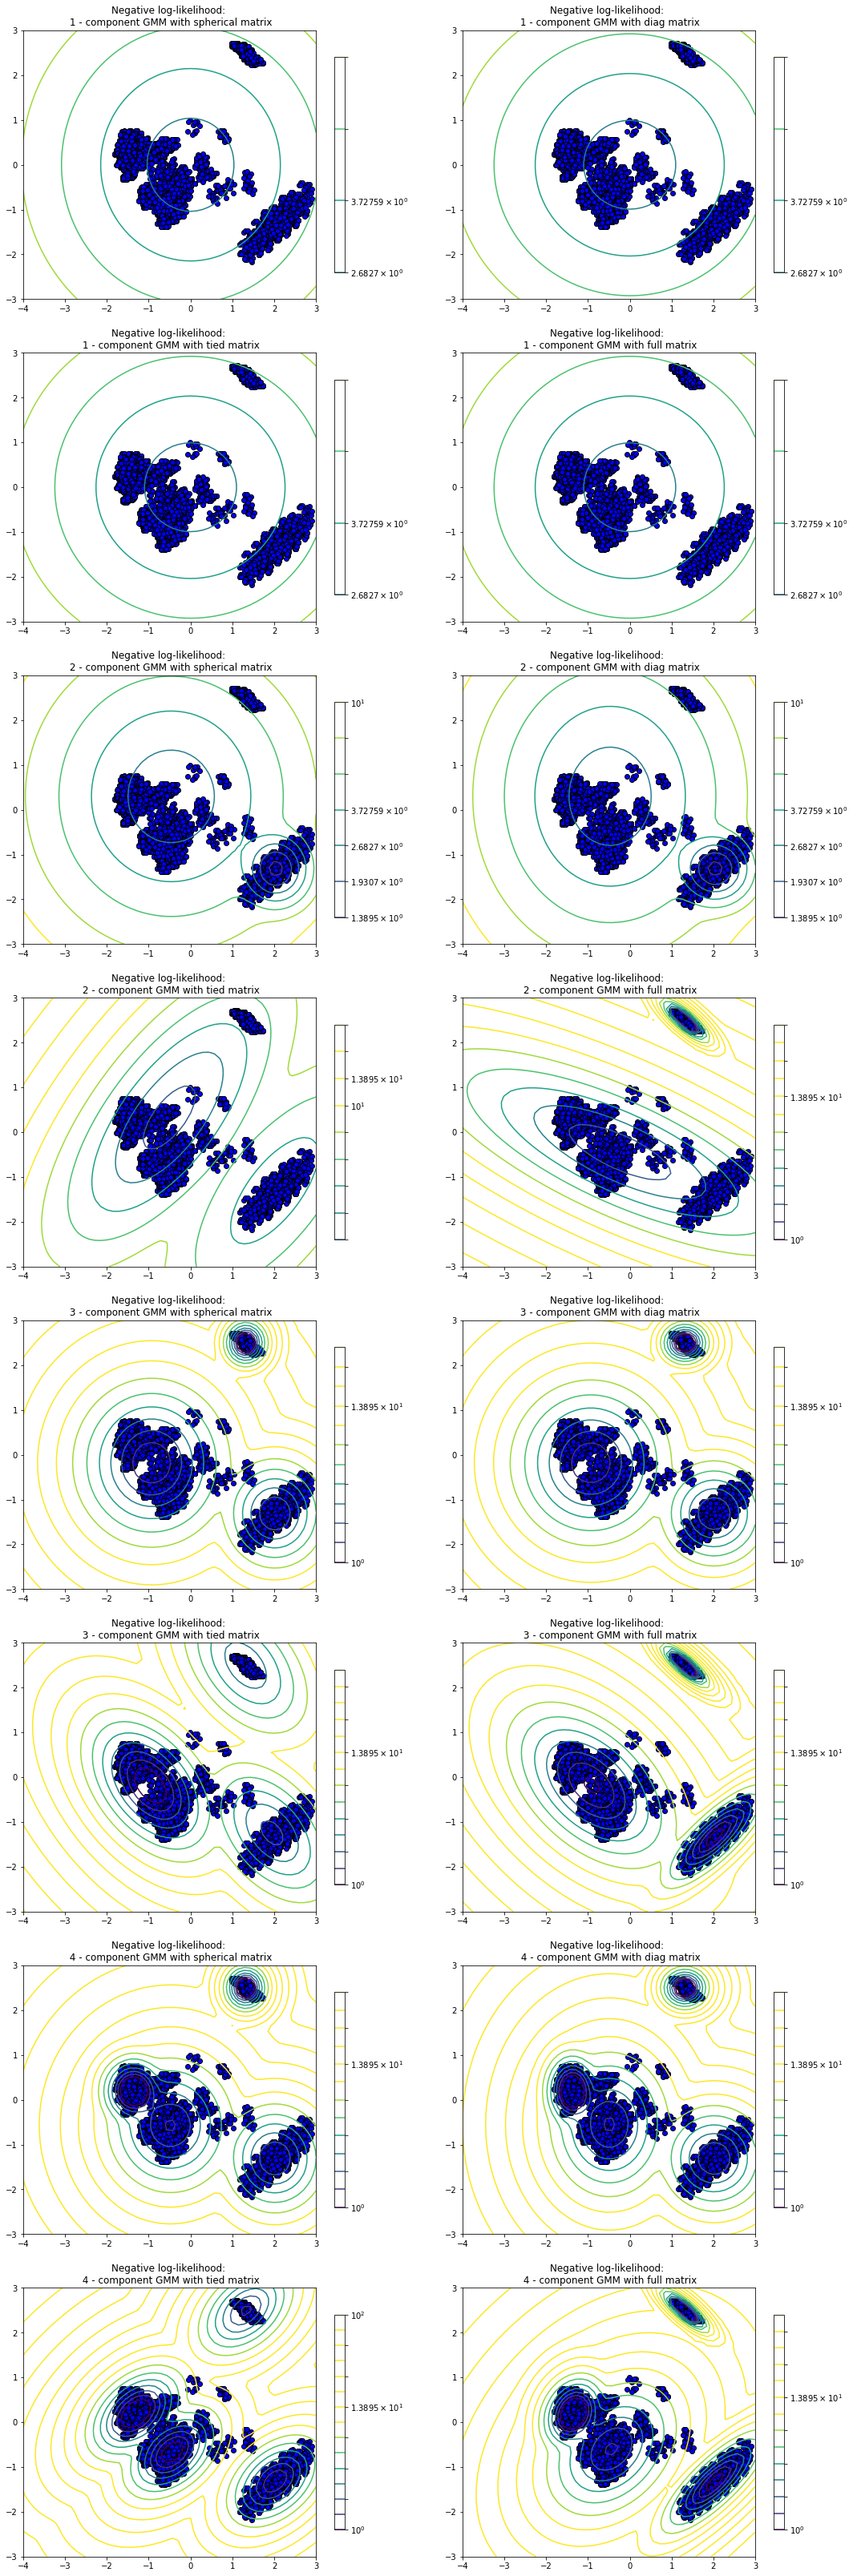

In [25]:
def P4():

    plt.figure(figsize=(18, 58))
    components = [1,2,3,4]
    covariance = ["spherical","diag","tied","full"]
    
    n_comp = 2
    pca_mod = PCA(n_components = 2)
    train_data_transformed = pca_mod.fit_transform(train_data)

    for i in range(4):
        for j in range(4):

            # Set up the plot
            cnt = 4*i + j + 1
            ax = plt.subplot(8, 2, cnt)

            # fit a Gaussian Mixture Model
            clf = GaussianMixture(n_components=components[i], covariance_type=covariance[j])
            clf.fit(train_data_transformed)

            # display predicted scores by the model as a contour plot
            # This plotting code borrowed from:
            # http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py.
            x = np.linspace(-4., 3.)
            y = np.linspace(-3., 3.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)
            Z = Z.reshape(X.shape)

            CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10.0),
                             levels=np.logspace(0, 2, 15))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            ax.scatter(train_data_transformed[:, 0], train_data_transformed[:, 1], edgecolors='black',color='blue',marker='o')

            plt.title('Negative log-likelihood: \n %i - component GMM with %s matrix' %(components[i],covariance[j]))

P4()


(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [26]:
def P5():
        
    n_comp = 2
    pca_mod = PCA(n_components = n_comp)
    train_data_transformed = pca_mod.fit_transform(train_data)

    # Pull out positive and negative training data
    positive = train_data_transformed[train_labels == 1, :]
    negative = train_data_transformed[train_labels == 0, :]

    # Fit a positive model
    clf_pos = GaussianMixture(n_components=4, covariance_type='full')
    clf_pos.fit(positive)

    # Fit a negative model
    clf_neg = GaussianMixture(n_components=4, covariance_type='full')
    clf_neg.fit(negative)

    # Apply the PCA transformation to the test data:
    test_data_transformed = pca_mod.transform(test_data)

    # Predict the test data
    test_probs_under_pos = clf_pos.score_samples(test_data_transformed)

    # Predict the test data
    test_probs_under_neg = clf_neg.score_samples(test_data_transformed)

    # Predict positive by if logprob uder positive is greater
    test_preds = np.zeros(1124)
    for i in range(1124):
        if test_probs_under_pos[i] > test_probs_under_neg[i]:
            test_preds[i] = 1

    # Report the accuracy
    correct, total = 0, 0
    for pred, label in zip(test_preds, test_labels):
        if pred == label: correct += 1
        total += 1
    print('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
        
P5()

total: 1124  correct: 1053  accuracy: 0.94


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.


In [27]:
def P5():
        
    n_comp = 3
    pca_mod = PCA(n_components = n_comp)
    train_data_transformed = pca_mod.fit_transform(train_data)

    # Pull out positive and negative training data
    positive = train_data_transformed[train_labels == 1, :]
    negative = train_data_transformed[train_labels == 0, :]

    # Fit a positive model
    clf_pos = GaussianMixture(n_components=2, covariance_type='tied')
    clf_pos.fit(positive)

    # Fit a negative model
    clf_neg = GaussianMixture(n_components=2, covariance_type='tied')
    clf_neg.fit(negative)

    # Apply the PCA transformation to the test data:
    test_data_transformed = pca_mod.transform(test_data)

    # Predict the test data
    test_probs_under_pos = clf_pos.score_samples(test_data_transformed)

    # Predict the test data
    test_probs_under_neg = clf_neg.score_samples(test_data_transformed)

    # Predict positive by if logprob uder positive is greater
    test_preds = np.zeros(1124)
    for i in range(1124):
        if test_probs_under_pos[i] > test_probs_under_neg[i]:
            test_preds[i] = 1

    # Report the accuracy
    correct, total = 0, 0
    for pred, label in zip(test_preds, test_labels):
        if pred == label: correct += 1
        total += 1
    print('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
        
P5()

total: 1124  correct: 961  accuracy: 0.85
